**Question 1**

In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [8]:
def euler_SHO(tN, x0, v0, N):
    h = tN / N
    x_i = np.zeros(N)
    v_i = np.zeros(N)
    
    x_i[0] = x0
    v_i[0] = v0
    
    for i in range(N-1):
        x_i[i+1] += x_i[i] + (h * v_i[i])
        v_i[i+1] += v_i[i] - (h * x_i[i])
    
    return x_i, v_i

In [9]:
euler_SHO(4,0,1,4)

(array([0., 1., 2., 2.]), array([ 1.,  1.,  0., -2.]))

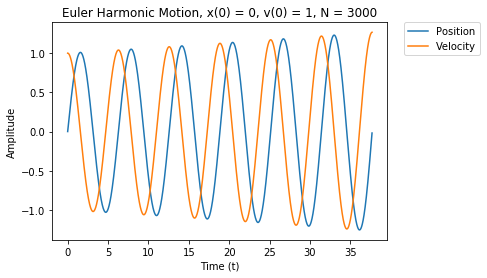

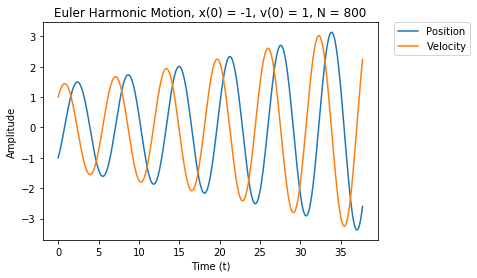

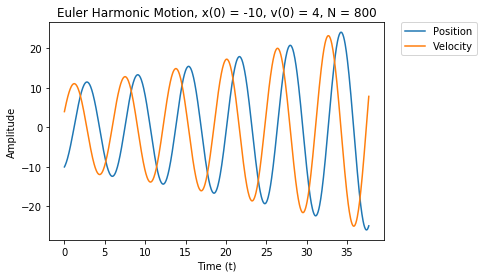

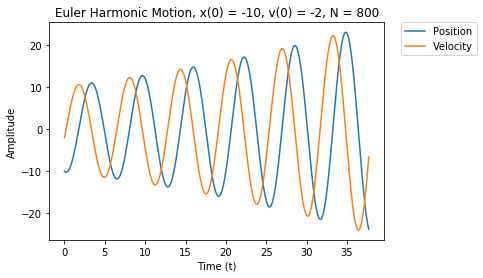

In [12]:
t1 = np.linspace(0, 12*np.pi, 800)
t2 = np.linspace(0, 12*np.pi, 3000)
plt.figure()

plt.plot(t2,euler_SHO(12*np.pi,0,1,3000)[0],label='Position')
plt.plot(t2,euler_SHO(12*np.pi,0,1,3000)[1],label='Velocity')
plt.xlabel("Time (t)")
plt.ylabel("Amplitude")
plt.title("Euler Harmonic Motion, x(0) = 0, v(0) = 1, N = 3000")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()


plt.figure()

plt.plot(t1,euler_SHO(12*np.pi,-1,1,800)[0],label='Position')
plt.plot(t1,euler_SHO(12*np.pi,-1,1,800)[1],label='Velocity')
plt.xlabel("Time (t)")
plt.ylabel("Amplitude")
plt.title("Euler Harmonic Motion, x(0) = -1, v(0) = 1, N = 800")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

plt.figure()

plt.plot(t1,euler_SHO(12*np.pi,-10,4,800)[0],label='Position')
plt.plot(t1,euler_SHO(12*np.pi,-10,4,800)[1],label='Velocity')
plt.xlabel("Time (t)")
plt.ylabel("Amplitude")
plt.title("Euler Harmonic Motion, x(0) = -10, v(0) = 4, N = 800")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

plt.figure()

plt.plot(t1,euler_SHO(12*np.pi,-10,-2,800)[0],label='Position')
plt.plot(t1,euler_SHO(12*np.pi,-10,-2,800)[1], label='Velocity')
plt.xlabel("Time (t)")
plt.ylabel("Amplitude")
plt.title("Euler Harmonic Motion, x(0) = -10, v(0) = -2, N = 800")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

It seems the equation operates in such a way that the velocity is always phase shifted a quarter of a period forward relative to the position. This matches with the idea that harmonic motion is modeled by sinusoidal functions.


**Question 2**

For the simple harmonic oscillator, the analytical solution is 

$$x = A \ sin(\omega \cdot t) + B \ cos(\omega \cdot t)$$

where $\omega = \sqrt{\frac{k}{m}}$ which, for us, equals 1, so $x = A sin(t) + B cos(t)$.

therefore $$ y = A \ sin(\omega \cdot t) + B \ cos(\omega \cdot t)= A \ cos(t) - B \ sin(t)$$

The initial conditions x(0) and y(0) determine B and A, respectively.

Using the solution for the initial conditions x(0) = -1, y(0) = 1:

In [14]:
def glob_error(tN, x0, v0, N):
    h = tN/N
    xi = euler_SHO(tN, x0, v0, N)[0]
    vi = euler_SHO(tN, x0, v0, N)[1]
    x_a = np.zeros(N)
    v_a = np.zeros(N)
    x_diff = np.zeros(N)
    v_diff = np.zeros(N)
    
    for i in range(N):
        x_a[i] = v0 * np.sin(i*h) + x0 * np.cos(i*h)
        x_diff[i] = x_a[i] - xi[i]
        
        v_a[i] = v0 * np.cos(i*h) - x0 * np.sin(i*h)
        v_diff[i] = v_a[i] - vi[i]
    
    return x_diff, v_diff

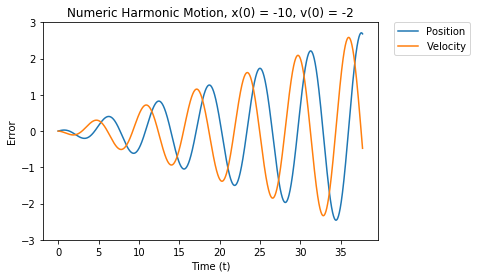

In [15]:
plt.plot(t2, glob_error(12*np.pi, -10, 2, 3000)[0], label='Position')
plt.plot(t2, glob_error(12*np.pi, -10, 2, 3000)[1], label='Velocity')
plt.xlabel("Time (t)")
plt.ylabel("Error")
plt.title("Euler Harmonic Motion, x(0) = -10, v(0) = -2")
plt.ylim(-3,3)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

**Question 3**


In [61]:
def max_error(tN, x0, v0, N):
    x = glob_error(tN, x0, v0, N)[0]
    v = glob_error(tN, x0, v0, N)[1]
    
    return max(x), max(v)

Being proportional to h with the same integrating time will show inverse proportionality to N. 

Text(0.5,1,'h Values versus Error')

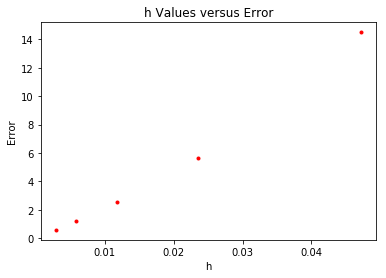

In [62]:
plt.plot(12*np.pi / 800, max_error(12*np.pi, -10, 2, 800)[0], 'r.')
#plt.plot(12*np.pi / 800, max_error(12*np.pi, -10, 2, 800)[1], 'b.')

plt.plot(12*np.pi / 1600, max_error(12*np.pi, -10, 2, 1600)[0], 'r.')
#plt.plot(12*np.pi / 1600, max_error(12*np.pi, -10, 2, 1600)[1], 'b.')

plt.plot(12*np.pi / 3200, max_error(12*np.pi, -10, 2, 3200)[0], 'r.')
#plt.plot(12*np.pi / 3200, max_error(12*np.pi, -10, 2, 3200)[1], 'b.')

plt.plot(12*np.pi / 6400, max_error(12*np.pi, -10, 2, 6400)[0], 'r.')
#plt.plot(12*np.pi / 6400, max_error(12*np.pi, -10, 2, 6400)[1], 'b.')

plt.plot(12*np.pi / 12800, max_error(12*np.pi, -10, 2, 12800)[0], 'r.')
#plt.plot(12*np.pi / 12800, max_error(12*np.pi, -10, 2, 12800)[1], 'b.')

plt.xlabel('h')
plt.ylabel('Error')
plt.title('h Values versus Error')

In [16]:
def energy(tN, x0, v0, N):
    h = tN/N
    xi = euler_SHO(tN, x0, v0, N)[0]
    vi = euler_SHO(tN, x0, v0, N)[1]
    
    E = xi**2 + vi**2
    
    return E

Text(0.5,1,'Time versus Explicit Euler Approximation of Energy')

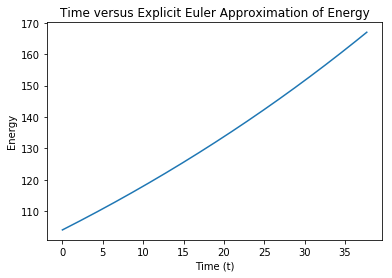

In [17]:
plt.plot(t2,energy(12*np.pi,-10,-2,3000))
plt.xlabel("Time (t)")
plt.ylabel("Energy")
plt.title("Time versus Explicit Euler Approximation of Energy")

The long range trend for E is that it is increasing over time with an error of $(x_{error})^2 + (v_{error})^2$. The vertical line at the end I can only determine is due to the vertical lines at x(tN) and v(tN) for my spring motion equation, which I still need to find the cause for.

**Question 5**

Multiplying out the matrix, we get two equations: 
$$x_{i + 1} - h v_{i + 1} = x_i$$
$$h x_{i + 1} + v_{i + 1} = v_i$$

Adding h times the lower line to the upper line gives:

$$(1+h^2)x_{i + 1} = x_i + h v_i$$
which simplifies to:
$$x_{i + 1} = \frac{x_i + h v_i}{(1+h^2)}$$

Similarly, subtracting h times the upper line from the lower line gives:
$$v_{i + 1} = \frac{v_i - h x_i}{(1+h^2)}$$


In [18]:
def implicit_HO(tN, x0, v0, N):
    h = tN / N
    x_i = np.zeros(N)
    v_i = np.zeros(N)
    
    x_i[0] = x0
    v_i[0] = v0
    
    for i in range(N-1):
        x_i[i+1] += (x_i[i] + (h * v_i[i]))/ (1 + h**2)
        v_i[i+1] += (v_i[i] - (h * x_i[i]))/ (1 + h**2)
    
    return x_i, v_i

In [19]:
def implicit_glob_error(tN, x0, v0, N):
    h = tN/N
    xi = implicit_HO(tN, x0, v0, N)[0]
    vi = implicit_HO(tN, x0, v0, N)[1]
    x_a = np.zeros(N)
    v_a = np.zeros(N)
    x_diff = np.zeros(N)
    v_diff = np.zeros(N)
    
    for i in range(N):
        x_a[i] = v0 * np.sin(i*h) + x0 * np.cos(i*h)
        x_diff[i] = x_a[i] - xi[i]
        
        v_a[i] = v0 * np.cos(i*h) - x0 * np.sin(i*h)
        v_diff[i] = v_a[i] - vi[i]
    
    return x_diff, v_diff

In [20]:
def implicit_energy(tN, x0, v0, N):
    h = tN/N
    xi = implicit_HO(tN, x0, v0, N)[0]
    vi = implicit_HO(tN, x0, v0, N)[1]
    
    E = xi**2 + vi**2
    
    return E

Text(0.5,1,'Implicit Numeric Harmonic Motion, x(0) = -10, v(0) = -2, N = 800')

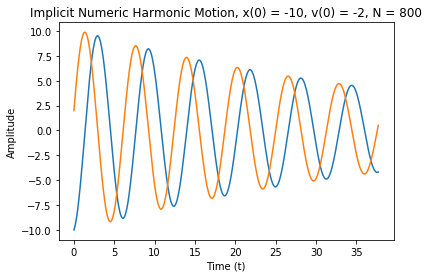

In [21]:
plt.plot(t1,implicit_HO(12*np.pi,-10,2,800)[0])
plt.plot(t1,implicit_HO(12*np.pi,-10,2,800)[1])
plt.xlabel("Time (t)")
plt.ylabel("Amplitude")
plt.title("Implicit Numeric Harmonic Motion, x(0) = -10, v(0) = -2, N = 800")


Text(0.5,1,'Error in Numeric Harmonic Motion, x(0) = -10, v(0) = -2')

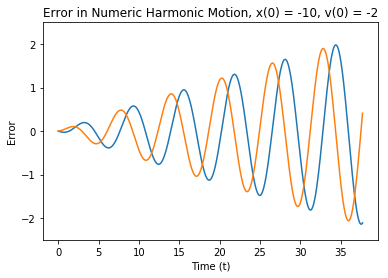

In [22]:
plt.plot(t2, implicit_glob_error(12*np.pi, -10, 2, 3000)[0])
plt.plot(t2, implicit_glob_error(12*np.pi, -10, 2, 3000)[1])
plt.xlabel("Time (t)")
plt.ylabel("Error")
plt.ylim(-2.5,2.5)

plt.title("Error in Numeric Harmonic Motion, x(0) = -10, v(0) = -2")

The error here is about 5/6 of that of the explicit method. 

Text(0.5,1,'Time versus Implicit Euler Approximation of Energy')

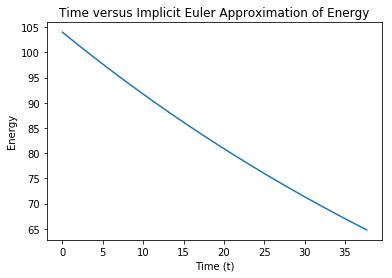

In [23]:
plt.plot(t2,implicit_energy(12*np.pi,-10,-2,3000))
plt.xlabel("Time (t)")
plt.ylabel("Energy")
plt.title("Time versus Implicit Euler Approximation of Energy")

It deviates from the constant E by only about 40 whereas the explicit method differs by about 70.

*** Part 2 ***

**Question 1 **

In [25]:
def true_HO_motion(tN, x0, v0, N):
    h = tN/N
    x = np.zeros(N)
    v = np.zeros(N)
    
    for i in range(N):
        x[i] = v0 * np.sin(i*h) + x0 * np.cos(i*h)       
        v[i] = v0 * np.cos(i*h) - x0 * np.sin(i*h)
    
    return x, v

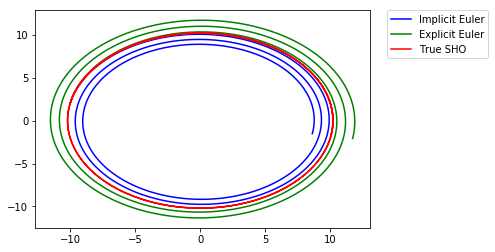

In [27]:
plt.plot(implicit_HO(5*np.pi,-10,2,800)[0],implicit_HO(5*np.pi,-10,2,800)[1],'b-',label='Implicit Euler')
plt.plot(euler_SHO(5*np.pi,-10,2,800)[0],euler_SHO(5*np.pi,-10,2,800)[1],'g-',label='Explicit Euler')
plt.plot(true_HO_motion(5*np.pi,-10,2,800)[0], true_HO_motion(5*np.pi,-10,2,800)[1], 'r-',label='True SHO')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

**Question 2**

In [30]:
def symplectic_HO(tN, x0, v0, N):
    h = tN / N
    x_i = np.zeros(N)
    v_i = np.zeros(N)
    
    x_i[0] = x0
    v_i[0] = v0
    
    for i in range(N-1):
        x_i[i+1] += (x_i[i] + (h * v_i[i]))
        v_i[i+1] += (v_i[i] - (h * x_i[i+1]))
    
    return x_i, v_i

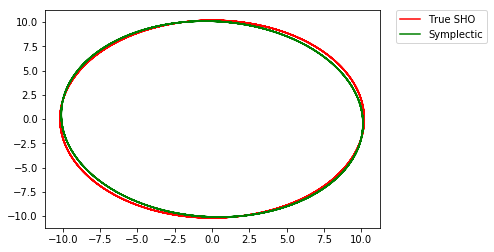

In [31]:
plt.plot(true_HO_motion(12*np.pi,-10,2,400)[0], true_HO_motion(12*np.pi,-10,2,400)[1], 'r-',label='True SHO')
plt.plot(symplectic_HO(12*np.pi,-10,2,400)[0], symplectic_HO(12*np.pi,-10,2,400)[1], 'g-',label='Symplectic')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [44]:
def traj_compare(tN, x0, v0, N):
    h = tN / N
    
    x, v = symplectic_HO(tN, x0, v0, N)
    
    diff_x = np.zeros(N-1)
    diff_v = np.zeros(N-1)
    
    for i in range(1,N):
        diff_x[i-1] += x[i] - x[i-1]
        diff_v[i-1] += v[i] - v[i-1]
    
    return diff_x, diff_v

In [45]:
def true_traj_compare(tN, x0, v0, N):
    x, v = true_HO_motion(tN, x0, v0, N)
    
    diff_x = np.zeros(N-1)
    diff_v = np.zeros(N-1)
    
    for i in range(1,N):
        diff_x[i-1] += x[i] - x[i-1]
        diff_v[i-1] += v[i] - v[i-1]
    
    return diff_x, diff_v

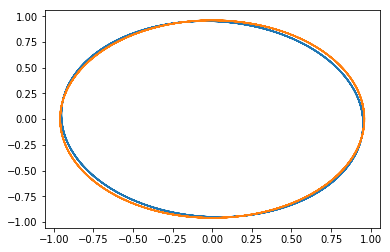

In [46]:
plt.plot(traj_compare(12*np.pi,-10,2,400)[0], traj_compare(12*np.pi,-10,2,400)[1])
plt.plot(true_traj_compare(12*np.pi,-10,2,400)[0], true_traj_compare(12*np.pi,-10,2,400)[1])

I don't know that I understood this question properly, because this graph doesn't look all that pretty.

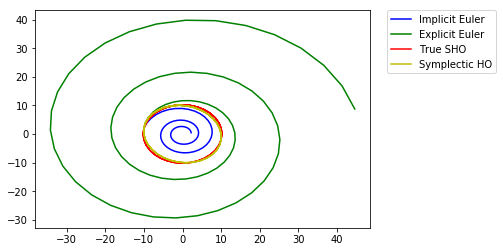

In [50]:
plt.plot(implicit_HO(5*np.pi,-10,2,80)[0],implicit_HO(5*np.pi,-10,2,80)[1],'b-',label='Implicit Euler')
plt.plot(euler_SHO(5*np.pi,-10,2,80)[0],euler_SHO(5*np.pi,-10,2,80)[1],'g-',label='Explicit Euler')
plt.plot(true_HO_motion(5*np.pi,-10,2,80)[0], true_HO_motion(5*np.pi,-10,2,80)[1], 'r-',label='True SHO')
plt.plot(symplectic_HO(5*np.pi,-10,2,80)[0], symplectic_HO(5*np.pi,-10,2,80)[1], 'y-',label='Symplectic HO')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

**Question 3**

In [51]:
def symplectic_energy(tN, x0, v0, N):
    h = tN/N
    xi = symplectic_HO(tN, x0, v0, N)[0]
    vi = symplectic_HO(tN, x0, v0, N)[1]
    
    E = xi**2 + vi**2
    
    return E

Text(0.5,1,'Time versus Symplectic Euler Approximation of Energy')

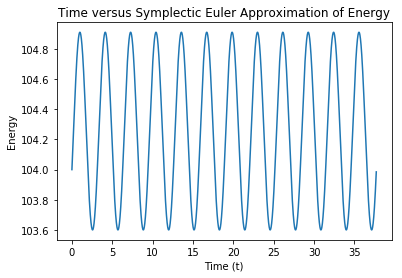

In [52]:
plt.plot(t2,symplectic_energy(12*np.pi,-10,-2,3000))
plt.xlabel("Time (t)")
plt.ylabel("Energy")
plt.title("Time versus Symplectic Euler Approximation of Energy")

(103, 105)

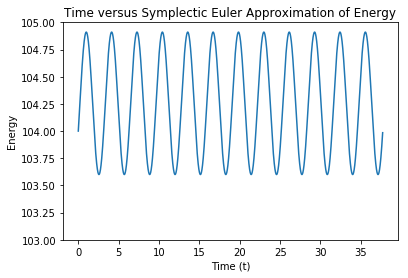

In [53]:
plt.plot(t2,symplectic_energy(12*np.pi,-10,-2,3000))
plt.xlabel("Time (t)")
plt.ylabel("Energy")
plt.title("Time versus Symplectic Euler Approximation of Energy")
plt.ylim(103,105)

The deviations are periodic (period = $2 \pi$) and stay centered around a constant energy. This relates to the phase space difference because the trajectory difference is periodic. There are two peaks per period where the difference is negative, and two where the difference is positive, creating the 24 peaks and troughs seen above.

There are changes here! Wow!